# Least Significant Bit (LSB)

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# get required images
if not os.path.isdir('Images'):
  !wget -O watermarking-images.zip "https://drive.google.com/uc?export=download&id=1GOz-jcICYEFZwMgzZdNEP3j7ZMDXIOuo"
  !unzip watermarking-images.zip

--2021-10-04 10:32:45--  https://drive.google.com/uc?export=download&id=1GOz-jcICYEFZwMgzZdNEP3j7ZMDXIOuo
Resolving drive.google.com (drive.google.com)... 173.194.216.138, 173.194.216.102, 173.194.216.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.216.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qfun9s8b0ajt28hfku1ftomgse7ab66g/1633343550000/05147498317285990661/*/1GOz-jcICYEFZwMgzZdNEP3j7ZMDXIOuo?e=download [following]
--2021-10-04 10:32:46--  https://doc-04-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qfun9s8b0ajt28hfku1ftomgse7ab66g/1633343550000/05147498317285990661/*/1GOz-jcICYEFZwMgzZdNEP3j7ZMDXIOuo?e=download
Resolving doc-04-9g-docs.googleusercontent.com (doc-04-9g-docs.googleusercontent.com)... 108.177.11.132, 2607:f8b0:400c:c01::84
Connecting to doc-04-9g-docs.googleusercontent.com (do

## Embedding

In [ ]:
# Read image and mark
im = cv2.imread('../Images/lena.bmp', 0)
print('Image shape: ', im.shape)

wat = cv2.imread('../Images/mark.png', 0)
print('Watermark shape: ', wat.shape)

Image shape:  (512, 512)
Watermark shape:  (512, 512)


In [ ]:
# Flatted the images for easy embedding
res_flat = im.flatten()
wat_flat = wat.flatten()

N = res_flat.shape[0]

# Example of decoded pixel value
pixel = format(res_flat[0], "08b")
print(pixel)
print(type(pixel))

10100000
<class 'str'>


In [ ]:
# Embedding
for i in range(N):
  im_pixel_to_binary = format(res_flat[i], "08b")
  wat_pixel_to_binary = format(wat_flat[i], "08b")
  
  # concate all the pixels until the LSB from the image
  # and the MSB of the watermark as LSB
  res_pixel = im_pixel_to_binary[:7] + wat_pixel_to_binary[0]

  res_flat[i] = int(res_pixel, 2)


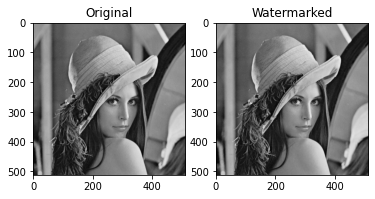

True

In [ ]:
# Reshape image
res = res_flat.reshape(512, 512)

# Show images side by side
plt.subplot(121)
plt.title('Original')
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.title('Watermarked')
plt.imshow(res,cmap='gray')
plt.show()

# save image
#res = Image.fromarray(res)
#res.save('watermarked.bmp')
cv2.imwrite('watermarked.bmp', res)

## Quality

There are several ways to compute the quality of an image.

One of the most common is the Peak Signal to Noise Ratio (PSNR)

$PSNR = 10 \cdot log_{10} \frac{V_{max}^2}{MSE}$

In [ ]:
# Compute PSNR
psnr = cv2.PSNR(im, res)
print('PSNR: %.2fdB' % psnr)

PSNR: 51.15dB


## Detection

In [ ]:
# Read the watermarked image and flatten it
watermarked = cv2.imread('watermarked.bmp', 0)
watermarked = watermarked.flatten()

# Create empy flatten image
N = watermarked.shape[0]
extracted = np.zeros(N)

for i in range(N):
  extracted[i] = int(format(watermarked[i], "08b")[-1], 2)

# Reshape extracted image
extracted = extracted.reshape(512, 512)

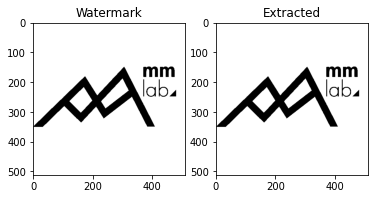

In [ ]:
# Read original watermark
mark = cv2.imread('Images/mark.png', 0)

# Show marks side by side
plt.subplot(121)
plt.title('Watermark')
plt.imshow(mark, cmap='gray')
plt.subplot(122)
plt.title('Extracted')
plt.imshow(extracted,cmap='gray')
plt.show()

## Exercises

1. Try to change the layer in which you insert the watermark and see how it impacts the PSNR

2. Compute the mean PSNR for 5 images in different layers. Examples
of expected results:

| LAYER | PSNR  |
|-------|-------|
| 7 (LSB)   | 51.14 |
| 2     | 21.32 |
| 4     | 33.13 |

3. Use the MSB (Most Significant Bit) of an image as watermark. 

4. Use a smaller watermark (e.g. 64x64) and try different positions

5. Apply different attacks to see how these affect the quality of the watermarked
image and extracted watermark

# Solutions

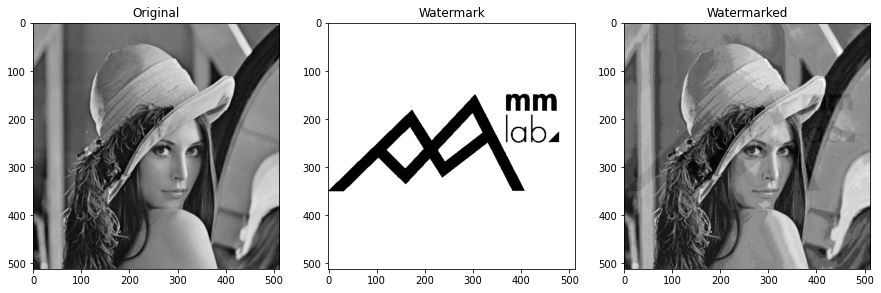

In [ ]:
########
# EX 1 #
########

im = cv2.imread('Images/lena.bmp', 0)
wat = cv2.imread('Images/mark.png', 0)

res_flat = im.flatten()
wat_flat = wat.flatten()

N = res_flat.shape[0]

# Embedding
LAYER = 3 # from 0 to 7
for i in range(N):
  im_pixel_to_binary = format(res_flat[i], "08b")
  wat_pixel_to_binary = format(wat_flat[i], "08b")
  
  res_pixel = im_pixel_to_binary[:LAYER] + wat_pixel_to_binary[0] + im_pixel_to_binary[LAYER+1:]


  res_flat[i] = int(res_pixel, 2)

res = res_flat.reshape(512, 512)

# Show images side by side
plt.figure(figsize=(15, 6))
plt.subplot(131)
plt.title('Original')
plt.imshow(im, cmap='gray')
plt.subplot(132)
plt.title('Watermark')
plt.imshow(wat,cmap='gray')
plt.subplot(133)
plt.title('Watermarked')
plt.imshow(res,cmap='gray')
plt.show()

In [ ]:
########
# EX 2 #
########
import cv2

wat = cv2.imread('Images/mark.png', 0)
wat_flat = wat.flatten()

imagesList = ["lena.bmp", "baboon.bmp", "cameraman.tif", "woman_darkhair.tif", "bridge.tif"]
imagesList = ['Images/'+i for i in imagesList]
layers = [7, 2, 4]

for LAYER in layers:
  avg_psnr = 0
  for imName in imagesList:

    im = cv2.imread(imName, 0)
    res_flat = im.flatten()

    N = res_flat.shape[0]

    # Embedding
    for i in range(N):
      im_pixel_to_binary = format(res_flat[i], "08b")
      wat_pixel_to_binary = format(wat_flat[i], "08b")
      
      res_pixel = im_pixel_to_binary[:LAYER] + wat_pixel_to_binary[0] + im_pixel_to_binary[LAYER+1:]
      res_flat[i] = int(res_pixel, 2)

    res = res_flat.reshape(512, 512)

    # Compute PSNR
    psnr = cv2.PSNR(im, res)
    #print('PSNR: %.2fdB' % psnr)

    avg_psnr += psnr

  print('For Layer %d the average PSNR is %.2fdB' % (LAYER, avg_psnr/len(imagesList)))


For Layer 7 the average PSNR is 51.14dB
For Layer 2 the average PSNR is 21.32dB
For Layer 4 the average PSNR is 33.13dB


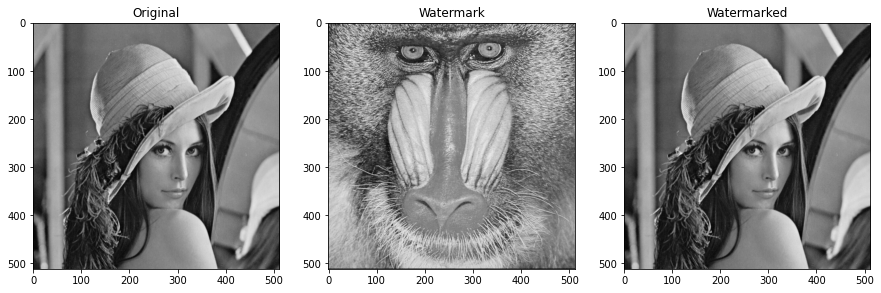

In [ ]:
########
# EX 3 #
########

im = cv2.imread('Images/lena.bmp', 0)
wat = cv2.imread('Images/baboon.bmp', 0)

res_flat = im.flatten()
wat_flat = wat.flatten()

N = res_flat.shape[0]

# Embedding
for i in range(N):
  im_pixel_to_binary = format(res_flat[i], "08b")
  wat_pixel_to_binary = format(wat_flat[i], "08b")
  
  res_pixel = im_pixel_to_binary[:-1] + wat_pixel_to_binary[0]

  res_flat[i] = int(res_pixel, 2)

res = res_flat.reshape(512, 512)

# Show images side by side
plt.figure(figsize=(15, 6))
plt.subplot(131)
plt.title('Original')
plt.imshow(im, cmap='gray')
plt.subplot(132)
plt.title('Watermark')
plt.imshow(wat,cmap='gray')
plt.subplot(133)
plt.title('Watermarked')
plt.imshow(res,cmap='gray')
plt.show()

(64, 64)
PSNR: 69.16dB


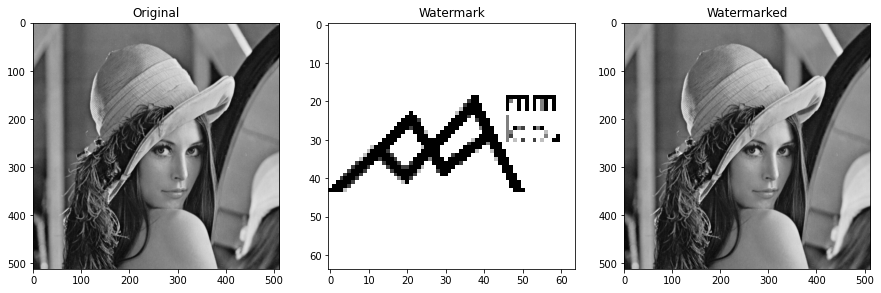

In [ ]:
########
# EX 4 #
########

im = cv2.imread('Images/lena.bmp', 0)
wat = cv2.imread('Images/mark.png', 0)
wat = cv2.resize(wat, (64, 64)) 
print(wat.shape)

res_flat = im.flatten()
wat_flat = wat.flatten()

N = wat_flat.shape[0]
start = 300

# Embedding
LAYER = 7 # from 0 to 7
for i in range(N):
  im_pixel_to_binary = format(res_flat[start+i], "08b")
  wat_pixel_to_binary = format(wat_flat[i], "08b")
  
  res_pixel = im_pixel_to_binary[:LAYER] + wat_pixel_to_binary[0] + im_pixel_to_binary[LAYER+1:]


  res_flat[start+i] = int(res_pixel, 2)

res = res_flat.reshape(512, 512)

# Compute PSNR
psnr = cv2.PSNR(im, res)
print('PSNR: %.2fdB' % psnr)

# Show images side by side
plt.figure(figsize=(15, 6))
plt.subplot(131)
plt.title('Original')
plt.imshow(im, cmap='gray')
plt.subplot(132)
plt.title('Watermark')
plt.imshow(wat,cmap='gray')
plt.subplot(133)
plt.title('Watermarked')
plt.imshow(res,cmap='gray')
plt.show()